In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Global_Refugee_Asylum_Data_(2019-2024).csv')
print(df.head())
print(df.info())

   Year Country of origin Country of asylum  Refugees under UNHCR's mandate  \
0  2019       Afghanistan       Afghanistan                               0   
1  2019       Afghanistan             Egypt                              28   
2  2019       Afghanistan         Argentina                              12   
3  2019       Afghanistan           Armenia                               5   
4  2019       Afghanistan         Australia                           11585   

   Asylum-seekers  Returned refugees  IDPs of concern to UNHCR  \
0               0                  0                   2553390   
1              36                  0                         0   
2               0                  0                         0   
3               0                  0                         0   
4            1710                  0                         0   

   Returned IDPss  Stateless persons  Others of concern  \
0               0                  0             447093   
1         

In [3]:
df["Other people in need of international protection"] = df["Other people in need of international protection"].fillna(0)

In [4]:
#Remove all rows where "Country of asylum" or "Country of origin" is Israel
df = df[(df["Country of asylum"] != "Israel") & (df["Country of origin"] != "Israel")]

In [5]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Year                                                0
Country of origin                                   0
Country of asylum                                   0
Refugees under UNHCR's mandate                      0
Asylum-seekers                                      0
Returned refugees                                   0
IDPs of concern to UNHCR                            0
Returned IDPss                                      0
Stateless persons                                   0
Others of concern                                   0
Other people in need of international protection    0
Host Community                                      0
dtype: int64


In [6]:
#total number of refugees grouped by country of asylum
total_refugees_by_asylum = df.groupby("Country of asylum")["Refugees under UNHCR's mandate"].sum()
print(total_refugees_by_asylum)

Country of asylum
Afghanistan                           333273
Albania                                14681
Algeria                               674786
Angola                                153637
Anguilla                                   0
                                       ...  
Venezuela (Bolivarian Republic of)    263176
Viet Nam                                  35
Yemen                                 705312
Zambia                                408284
Zimbabwe                               57829
Name: Refugees under UNHCR's mandate, Length: 184, dtype: int64


In [7]:
#average number of asylum seekers for each country of origin
avg_asylum_seekers_by_origin = df.groupby("Country of origin")["Asylum-seekers"].mean()
print(avg_asylum_seekers_by_origin)

Country of origin
Afghanistan       2790.652033
Albania            780.369427
Algeria            188.315972
Andorra              5.375000
Angola             361.964158
                     ...     
Viet Nam           343.797235
Western Sahara      68.486486
Yemen              362.425044
Zambia              32.880000
Zimbabwe           299.569620
Name: Asylum-seekers, Length: 211, dtype: float64


In [8]:
#the top 10 countries with the highest refugee numbers for the year 2024
top_refugees_2024 = df[df["Year"] == 2024].groupby("Country of asylum")["Refugees under UNHCR's mandate"].sum().nlargest(10)
print(top_refugees_2024)

Country of asylum
Iran (Islamic Rep. of)    3764517
Türkiye                   3148663
Germany                   2667013
Uganda                    1656440
Pakistan                  1586287
Chad                      1239907
Russian Federation        1226666
Ethiopia                   997892
Bangladesh                 984651
Poland                     979959
Name: Refugees under UNHCR's mandate, dtype: int64


In [9]:
#total number of internally displaced persons (IDPs) for each year
total_idps_by_year = df.groupby("Year")["IDPs of concern to UNHCR"].sum()
print(total_idps_by_year)

Year
2019    43503362
2020    48557439
2021    51322623
2022    57321197
2023    63251367
2024    67053895
Name: IDPs of concern to UNHCR, dtype: int64


In [10]:
#average number of returned refugees per country of origin
avg_returned_by_origin = df.groupby("Country of origin")["Returned refugees"].mean()
print(avg_returned_by_origin)

Country of origin
Afghanistan       181.151220
Albania             0.000000
Algeria             0.000000
Andorra             0.000000
Angola              0.078853
                     ...    
Viet Nam            0.000000
Western Sahara      0.148649
Yemen               0.456790
Zambia              0.000000
Zimbabwe            2.489451
Name: Returned refugees, Length: 211, dtype: float64


In [11]:
#how many distinct entities are linked to a category per time unit
countries_by_year = df[df["Refugees under UNHCR's mandate"] > 0].groupby("Year")["Country of asylum"].nunique()
print(countries_by_year)

Year
2019    162
2020    161
2021    162
2022    161
2023    163
2024    167
Name: Country of asylum, dtype: int64


In [12]:
#data on legal status uncertainties grouped geographically
total_stateless_by_asylum = df.groupby("Country of asylum")["Stateless persons"].sum()
print(total_stateless_by_asylum)

Country of asylum
Afghanistan                                0
Albania                                12622
Algeria                                    0
Angola                                     0
Anguilla                                   0
                                       ...  
Venezuela (Bolivarian Republic of)         0
Viet Nam                              179379
Yemen                                      0
Zambia                                     0
Zimbabwe                                   0
Name: Stateless persons, Length: 184, dtype: int64


In [13]:
#cumulative case counts related to a particular entity
egypt_asylum_seekers = df[df["Country of asylum"] == "Egypt"]["Asylum-seekers"].sum()
print(f"Total Asylum-seekers in Egypt: {egypt_asylum_seekers}")

Total Asylum-seekers in Egypt: 914116


In [14]:
#average of figures linked to local community context
avg_host_by_year = df.groupby("Year")["Host Community"].mean()
print(avg_host_by_year)

Year
2019     429.864951
2020     808.778415
2021    1223.619887
2022    4094.645360
2023    4392.437973
2024    4384.450594
Name: Host Community, dtype: float64


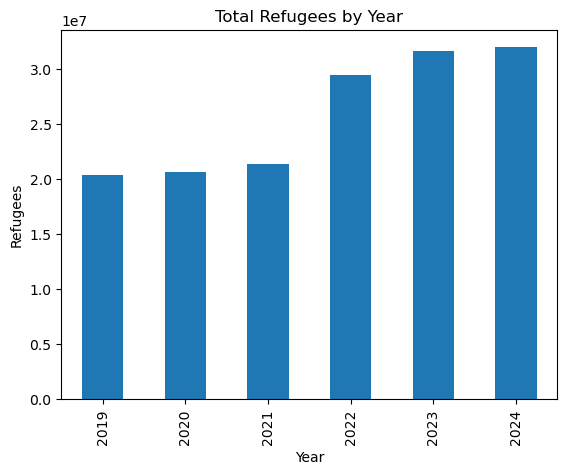

In [15]:
df.groupby("Year")["Refugees under UNHCR's mandate"].sum().plot(kind="bar")
plt.title("Total Refugees by Year")
plt.xlabel("Year")
plt.ylabel("Refugees")
plt.show()

In [16]:
#a specific demographic across different origins
total_others_by_origin = df.groupby("Country of origin")["Others of concern"].sum()
print(total_others_by_origin)

Country of origin
Afghanistan       830994
Albania                0
Algeria              471
Andorra                0
Angola             97764
                   ...  
Viet Nam             413
Western Sahara        15
Yemen                180
Zambia                30
Zimbabwe             894
Name: Others of concern, Length: 211, dtype: int64


In [17]:
#typical values for a category associated with return flows
avg_returned_idps_by_asylum = df.groupby("Country of asylum")["Returned IDPss"].mean()
print(avg_returned_idps_by_asylum)

Country of asylum
Afghanistan                           35329.40000
Albania                                   0.00000
Algeria                                   0.00000
Angola                                    0.00000
Anguilla                                  0.00000
                                         ...     
Venezuela (Bolivarian Republic of)        0.00000
Viet Nam                                  0.00000
Yemen                                   791.70297
Zambia                                    0.00000
Zimbabwe                                  0.00000
Name: Returned IDPss, Length: 184, dtype: float64


In [18]:
#how many locations surpass a defined quantitative threshold
countries_over_100k = len(df[df["Refugees under UNHCR's mandate"] > 100000]["Country of asylum"].unique())
print(f"Countries with >100K Refugees: {countries_over_100k}")

Countries with >100K Refugees: 42


In [19]:
#yearly behavioral average for specific migration metrics
avg_asylum_by_year = df.groupby("Year")["Asylum-seekers"].mean()
print(avg_asylum_by_year)

Year
2019     766.456258
2020     768.557016
2021     834.074714
2022     925.711844
2023    1149.941592
2024    1332.605584
Name: Asylum-seekers, dtype: float64


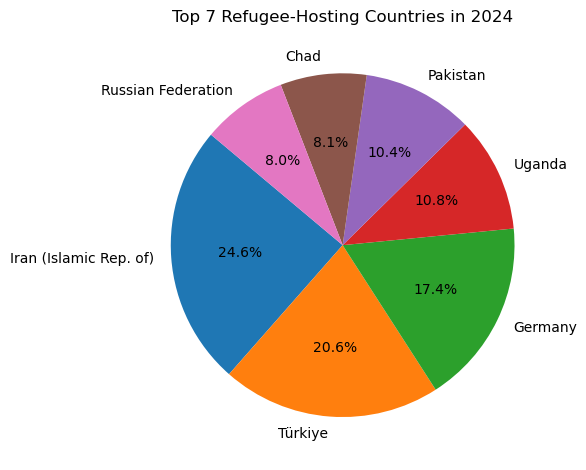

In [20]:
latest_year = df["Year"].max()
top7_countries = df[df["Year"] == latest_year].groupby("Country of asylum")["Refugees under UNHCR's mandate"].sum().nlargest(7)
top7_countries.plot(kind="pie", autopct="%1.1f%%", startangle=140)
plt.title(f"Top 7 Refugee-Hosting Countries in {latest_year}")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [21]:
#leading locations based on reintegration movements
top_returned_refugees = df.groupby("Country of asylum")["Returned refugees"].sum().nlargest(5)
print(top_returned_refugees)

Country of asylum
Sudan       757925
Poland      483775
Uganda      391697
Ethiopia    243268
Germany     168842
Name: Returned refugees, dtype: int64


In [22]:
#the mean number of individuals requiring specific legal consideration
avg_protection_by_asylum = df.groupby("Country of asylum")["Other people in need of international protection"].mean()
print(avg_protection_by_asylum)

Country of asylum
Afghanistan                            0.0
Albania                                0.0
Algeria                                0.0
Angola                                 0.0
Anguilla                              11.4
                                      ... 
Venezuela (Bolivarian Republic of)     0.0
Viet Nam                               0.0
Yemen                                  0.0
Zambia                                 0.0
Zimbabwe                               0.0
Name: Other people in need of international protection, Length: 184, dtype: float64


In [23]:
#continental subset and aggregates regional figures
europe_refugees = df[df["Country of asylum"].isin(["Germany", "France", "Italy"])]["Refugees under UNHCR's mandate"].sum()
print(f"Total Refugees in Europe: {europe_refugees}")

Total Refugees in Europe: 15640305


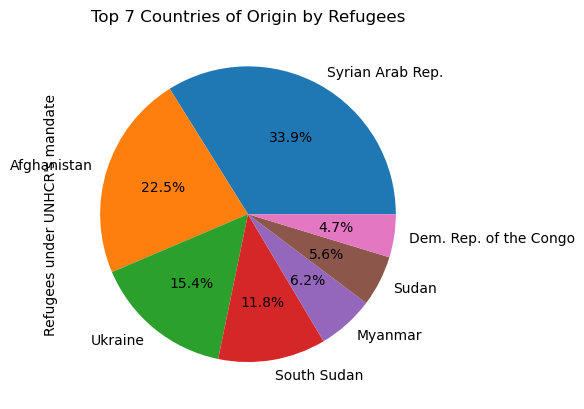

In [24]:
df.groupby("Country of origin")["Refugees under UNHCR's mandate"].sum().nlargest(7).plot(kind="pie", autopct='%1.1f%%')
plt.title("Top 7 Countries of Origin by Refugees")
plt.show()

In [25]:
#Averages a societal measure across multiple hosting locations
avg_host_by_asylum = df.groupby("Country of asylum")["Host Community"].mean()
print(avg_host_by_asylum)

Country of asylum
Afghanistan                           156535.5
Albania                                    0.0
Algeria                                    0.0
Angola                                     0.0
Anguilla                                   0.0
                                        ...   
Venezuela (Bolivarian Republic of)         0.0
Viet Nam                                   0.0
Yemen                                      0.0
Zambia                                     0.0
Zimbabwe                                   0.0
Name: Host Community, Length: 184, dtype: float64


In [26]:
#Yearly aggregation for a distinct classification of legal identity
total_stateless_by_year = df.groupby("Year")["Stateless persons"].sum()
print(total_stateless_by_year)

Year
2019    4217732
2020    4179289
2021    4338150
2022    4428279
2023    4358153
2024    4368223
Name: Stateless persons, dtype: int64


In [27]:
#quantity of affected areas under a particular scope in a given time
idp_countries_2023 = len(df[(df["Year"] == 2023) & (df["IDPs of concern to UNHCR"] > 0)]["Country of asylum"].unique())
print(f"Countries with IDPs in 2023: {idp_countries_2023}")

Countries with IDPs in 2023: 36


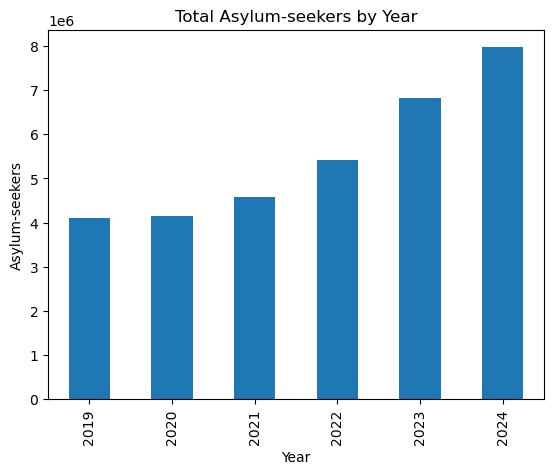

In [28]:
df.groupby("Year")["Asylum-seekers"].sum().plot(kind="bar")
plt.title("Total Asylum-seekers by Year")
plt.xlabel("Year")
plt.ylabel("Asylum-seekers")
plt.show()

In [29]:
#peak figures for internally displaced individuals within a single context
afghanistan_idps = df[df["Country of asylum"] == "Afghanistan"]["IDPs of concern to UNHCR"].max()
print(f"Max IDPs in Afghanistan: {afghanistan_idps}")

Max IDPs in Afghanistan: 3457744


In [30]:
#average of individuals returning to origin
avg_returned_by_year = df.groupby("Year")["Returned refugees"].mean()
print(avg_returned_by_year)

Year
2019     59.076665
2020     46.455202
2021     78.028358
2022    231.799863
2023    177.087022
2024     72.484033
Name: Returned refugees, dtype: float64


In [31]:
#Total persons requiring humanitarian protocols in a specific year
total_protection_2024 = df[df["Year"] == 2024]["Other people in need of international protection"].sum()
print(f"Total Protection Needed in 2024: {total_protection_2024}")

Total Protection Needed in 2024: 5793723.0


In [32]:
#behavioral norm in high-capacity zones
high_host_avg = df[df["Refugees under UNHCR's mandate"] > 10000].groupby("Country of asylum")["Host Community"].mean()
print(high_host_avg)

Country of asylum
Afghanistan                           0.0
Algeria                               0.0
Angola                                0.0
Armenia                               0.0
Australia                             0.0
                                     ... 
United States of America              0.0
Uzbekistan                            0.0
Venezuela (Bolivarian Republic of)    0.0
Yemen                                 0.0
Zambia                                0.0
Name: Host Community, Length: 93, dtype: float64


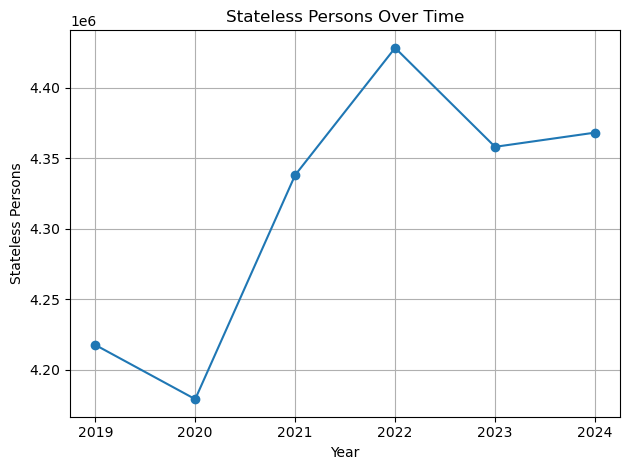

In [33]:
df.groupby("Year")["Stateless persons"].sum().plot(kind="line", marker="o")
plt.title("Stateless Persons Over Time")
plt.xlabel("Year")
plt.ylabel("Stateless Persons")
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
#The most affected zones based on application counts
top_asylum_seekers = df.groupby("Country of asylum")["Asylum-seekers"].sum().nlargest(5)
print(top_asylum_seekers)

Country of asylum
United States of America    10729386
Peru                         3115967
Germany                      1785264
Türkiye                      1644457
Mexico                       1055076
Name: Asylum-seekers, dtype: int64


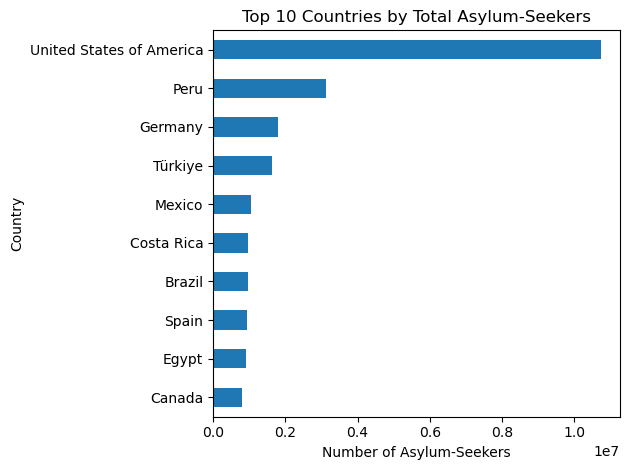

In [35]:
top_asylum_seekers = df.groupby("Country of asylum")["Asylum-seekers"].sum().nlargest(10)
top_asylum_seekers.plot(kind="barh")
plt.title("Top 10 Countries by Total Asylum-Seekers")
plt.xlabel("Number of Asylum-Seekers")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

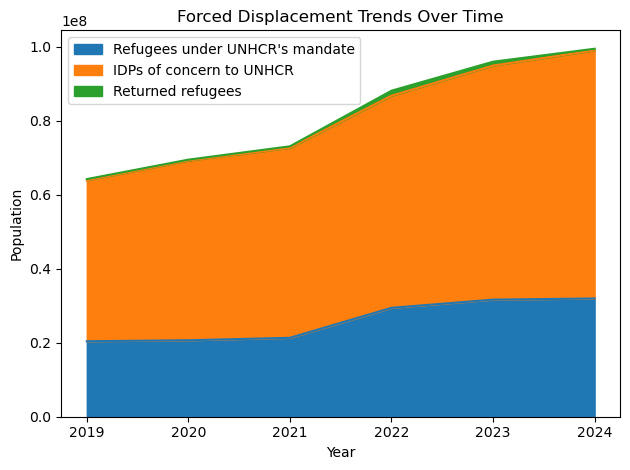

In [36]:
df_grouped_year = df.groupby("Year")[["Refugees under UNHCR's mandate", "IDPs of concern to UNHCR", "Returned refugees"]].sum()
df_grouped_year.plot(kind="area", stacked=True)
plt.title("Forced Displacement Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.tight_layout()
plt.show()